In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


---
# Algebraic and geometric interpretations
---


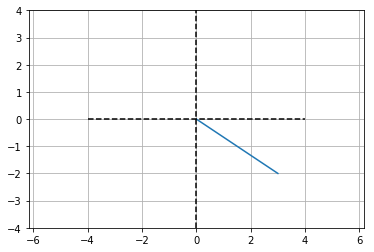

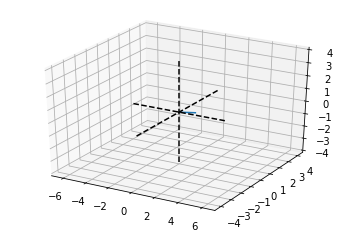

In [4]:

# 2-dimensional vector
v2 = [ 3, -2 ]

# 3-dimensional vector
v3 = [ 4, -3, 2 ]

# row to column (or vice-versa):
v3t = np.transpose(v3)

v3_transpose = np.array(v3).T


# plot them
plt.plot([0,v2[0]],[0,v2[1]])
plt.axis('equal')
plt.plot([-4, 4],[0, 0],'k--')
plt.plot([0, 0],[-4, 4],'k--')
plt.grid()
plt.axis((-4, 4, -4, 4))
plt.show()


# plot the 3D vector
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot([0, v3[0]],[0, v3[1]],[0, v3[2]])

# make the plot look nicer
plt.axis('equal')
ax.plot([0, 0],[0, 0],[-4, 4],'k--')
ax.plot([0, 0],[-4, 4],[0, 0],'k--')
ax.plot([-4, 4],[0, 0],[0, 0],'k--')
plt.show()


---
# Vector addition/subtraction
---


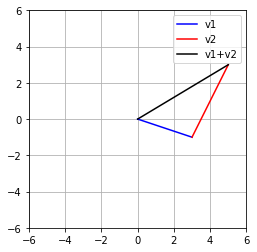

In [62]:

# two vectors in R2
v1 = np.array([ 3, -1 ])
v2 = np.array([ 2,  4 ])

v3 = v1 + v2


# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')
plt.plot([0, v2[0]]+v1[0],[0, v2[1]]+v1[1],'r',label='v2')
plt.plot([0, v3[0]],[0, v3[1]],'k',label='v1+v2')

plt.legend()
plt.axis('square')
plt.axis((-6, 6, -6, 6 ))
plt.grid()
plt.show()



---
# Vector-scalar multiplication
---


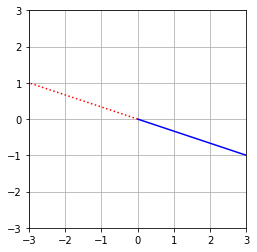

In [16]:
# vector and scalar
v1 = np.array([ 3, -1 ])
l  = -5
v1m = v1*l # scalar-modulated

# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v_1')
plt.plot([0, v1m[0]],[0, v1m[1]],'r:',label='\lambda v_1')

plt.axis('square')
plt.axis((-3,3,-3,3))
plt.grid()
plt.show()


---
# Vector-vector multiplication: the dot product
---


In [17]:
## many ways to compute the dot product

v1 = np.array([ 1, 2, 3, 4, 5, 6 ])
v2 = np.array([ 0, -4, -3, 6, 5, 7 ])

# method 1

v1 = v1.T
dp = sum( np.multiply(v1,v2) )

# dp = np.multiply(v1,v2)

# method 2
dp = np.dot( v1,v2 )

# method 3
dp = np.matmul( v1,v2 )

# method 4
dp = 0  # initialize

# loop over elements
for i in range(0,len(v1)):
    
    # multiply corresponding element and sum
    dp = dp + v1[i]*v2[i]
    
print(dp)


74



---
# Vector length
---


In [5]:
# a vector
v1 = np.array([ 1, 2, 3, 4, 5, 6, ])

# methods 1-4, just like with the regular dot product, e.g.:
vl = np.sqrt( sum( np.multiply(v1,v1)) )

# method 5: take the norm
vl = np.linalg.norm(v1)

print(vl)

9.53939201417



---
# The dot product from a geometric perspective
---


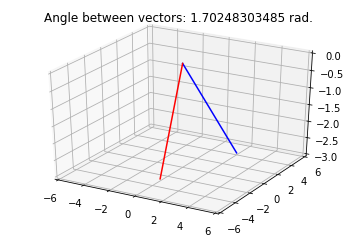

In [6]:

# two vectors
v1 = np.array([ 2,  4, -3 ])
v2 = np.array([ 0, -3, -3 ])

# compute the angle (radians) between two vectors
ang = np.arccos( np.dot(v1,v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)) )


# draw them
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot([0, v1[0]],[0, v1[1]],[0, v1[2]],'b')
ax.plot([0, v2[0]],[0, v2[1]],[0, v2[2]],'r')

plt.axis((-6, 6, -6, 6))
plt.title('Angle between vectors: %s rad.' %ang)
plt.show()


In [7]:
## equivalence of algebraic and geometric dot product formulas

# two vectors
v1 = np.array([ 2,  4, -3 ])
v2 = np.array([ 0, -3, -3 ])


# algebraic
dp_a = np.dot( v1,v2 )

# geometric
dp_g = np.linalg.norm(v1)*np.linalg.norm(v2)*np.cos(ang)

# print dot product to command
print(dp_a)
print(dp_g)


-3
-3.0



---
# Vector outer product
---


In [124]:

v1 = np.array([  1, 2, 3 ])
v2 = np.array([ -1, 0, 1 ])

# outer product
np.outer(v1,v2)

# terrible programming, but helps conceptually:
op = np.zeros((len(v1),len(v1)))
for i in range(0,len(v1)):
    for j in range(0,len(v2)):
        op[i,j] = v1[i] * v2[j]

print(op)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-3.  0.  3.]]



---
# Hermitian transpose (a.k.a. conjugate transpose)
---


In [18]:
# create a complex number
z = np.complex(3,4)

# magnitude
print( np.linalg.norm(z) )

# by transpose?
print( np.transpose(z)*z )

# by Hermitian transpose
print( np.transpose(z.conjugate())*z )


# complex vector
v = np.array( [ 3, 4j, 5+2j, np.complex(2,-5) ] )
print( v.T )
print( np.transpose(v) )
print( np.transpose(v.conjugate()) )

5.0
(-7+24j)
(25+0j)
[3.+0.j 0.+4.j 5.+2.j 2.-5.j]
[3.+0.j 0.+4.j 5.+2.j 2.-5.j]
[3.-0.j 0.-4.j 5.-2.j 2.+5.j]



---
# Unit vector
---


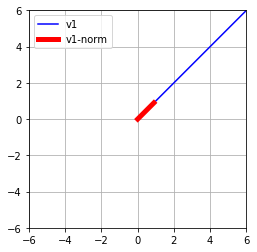

In [144]:

# vector
v1 = np.array([ -3, 6 ])

# mu
mu = 1/np.linalg.norm(v1)

v1n = v1*mu

# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')
h=plt.plot([0, v1n[0]],[0, v1n[1]],'r',label='v1-norm')
plt.setp(h,linewidth=5)

# axis square
plt.axis('square')
plt.axis(( -6, 6, -6, 6 ))
plt.grid()
plt.legend()
plt.show()


---
# Span
---


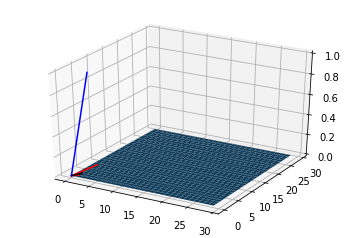

In [8]:
# set S
S1 = np.array([1, 1, 0])
S2 = np.array([1, 7, 0])

# vectors v and w
v = np.array([1, 2, 0])
w = np.array([3, 2, 1])

# draw vectors
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot([0, S1[0]],[0, S1[1]],[0, S1[2]],'r')
ax.plot([0, S2[0]],[0, S2[1]],[0, S2[2]],'r')

ax.plot([0, v[0]],[0, v[1]],[0, v[2]],'k')
ax.plot([0, w[0]],[0, w[1]],[0, w[2]],'b')

# now draw plane
xx, yy = np.meshgrid(range(30), range(30))
cp = np.cross(S1,S2)
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)

plt.show()